In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pickle
import model, analysis, util, implicit_curve
compute = True

In [29]:
import importlib
util = importlib.reload(util)
analysis = importlib.reload(analysis)
implicit_curve = importlib.reload(implicit_curve)
model = importlib.reload(model)
compute = True

In [3]:
f_a = 3e14
H_inf = 2e10

## Compare time evolutions for harmonic and cosine potentials

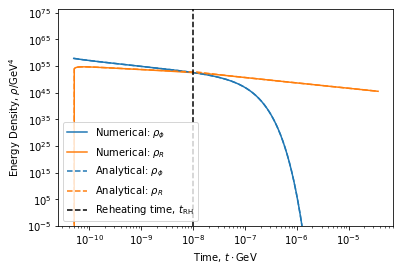

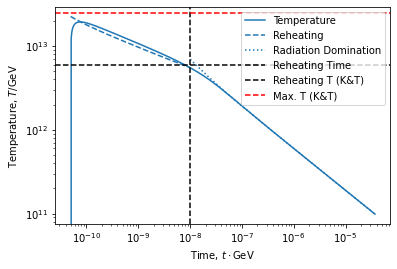

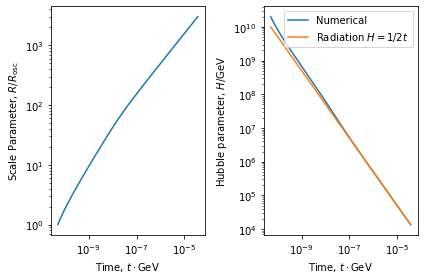

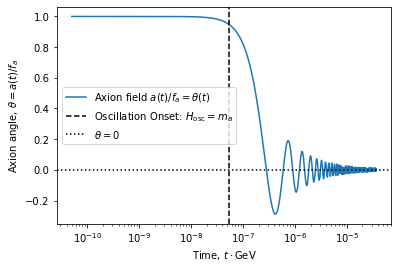

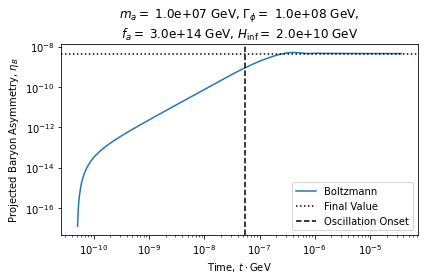

axion oscillations: 58
final asymmetry: 4.581506364684119e-09


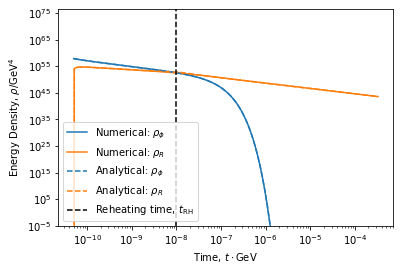

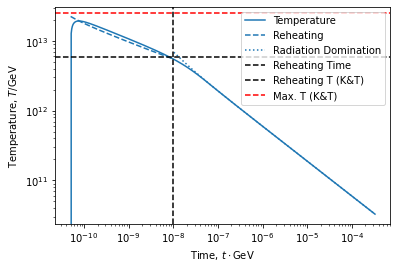

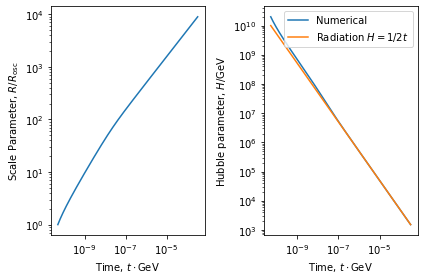

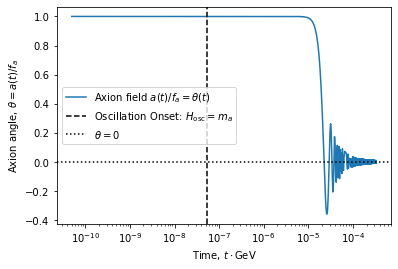

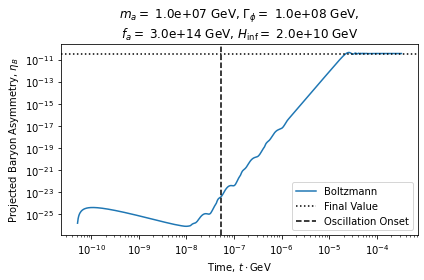

axion oscillations: 372
final asymmetry: 3.546712464749655e-11


In [12]:
theta0 = 1 # np.pi - 1e-8
m_a = 1e7
Gamma_phi = 1e8
analysis.make_time_plots(m_a, f_a, Gamma_phi, H_inf, show_all=True, theta0=theta0, use_cosine_potential=False, use_temp_dep_axion_mass=False)
analysis.make_time_plots(m_a, f_a, Gamma_phi, H_inf, 
                         show_all=True, theta0=theta0, # sigma_eff=10*model.paper_sigma_eff,
                         use_cosine_potential=True,  use_temp_dep_axion_mass=True,
                         converge=True, end=1e-4);

## Contour Plot of the Asymmetry in the Parameter Space for fixed $f_a$

In [13]:
theta0 = 1.0 # np.pi - 1e-2

In [19]:
name = "temp_dep_eta_B.pkl"

if compute:
    m_a_s, Gamma_phi_s, eta_B_numerical = analysis.sample_parameter_space_numerical(f_a, H_inf, 
        kwargs=dict(bg_kwargs=dict(use_cosine_potential=True, theta0=theta0, use_temp_dep_axion_mass=True)))
    util.save_data(name, m_a_s, Gamma_phi_s, eta_B_numerical)
else:
    m_a_s, Gamma_phi_s, eta_B_numerical = util.load_data(name)

/home/jana/Documents/master-project/axion_spg/model.py:265: RuntimeWarning: overflow encountered in exp
  def rhs_axion_decay(log_t, y, Gamma_a):
/home/jana/Documents/master-project/axion_spg/model.py:269: RuntimeWarning: invalid value encountered in double_scalars
  #assert rho_R != 0.0,  f"t = {t}, rho_a = {rho_a}"
/home/jana/Documents/master-project/axion_spg/model.py:265: RuntimeWarning: overflow encountered in exp
  def rhs_axion_decay(log_t, y, Gamma_a):
/home/jana/Documents/master-project/axion_spg/model.py:269: RuntimeWarning: invalid value encountered in double_scalars
  #assert rho_R != 0.0,  f"t = {t}, rho_a = {rho_a}"
/home/jana/Documents/master-project/axion_spg/model.py:269: RuntimeWarning: divide by zero encountered in double_scalars
  #assert rho_R != 0.0,  f"t = {t}, rho_a = {rho_a}"
/home/jana/Documents/master-project/axion_spg/model.py:269: RuntimeWarning: overflow encountered in double_scalars
  #assert rho_R != 0.0,  f"t = {t}, rho_a = {rho_a}"


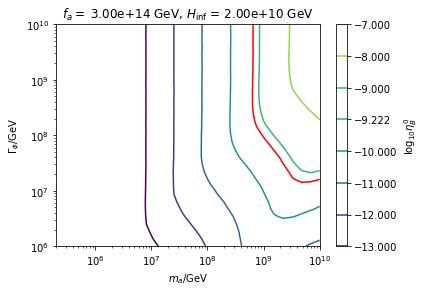

In [45]:
levels = np.sort(np.concatenate([np.arange(-13, -7 + 1), [np.log10(model.eta_B_observed)]]))

# numerical result
CS2 = plt.contour(m_a_s, Gamma_phi_s, np.log10(eta_B_numerical), levels=levels)

# labels
plt.colorbar().set_label(r"$\log_{10} \eta_B^0$")
CS2.collections[np.where(CS2.levels == np.log10(model.eta_B_observed))[0][0]].set_color("red")
plt.xscale("log"); plt.yscale("log")
plt.xlabel(r"$m_a / \mathrm{GeV}$")
plt.ylabel(r"$\Gamma_\phi / \mathrm{GeV}$")
plt.tight_layout()
plt.title(f"$f_a =$ {f_a:.2e} GeV, $H_\\mathrm{{inf}}$ = {H_inf:.2e} GeV")
plt.savefig(util.make_plot_path("sbg_leptogenesis_axion_osc_temp_dep_contour_plot.pdf"))

## Correct Asymmetry as a Function of $f_a$

In [28]:
name = "temp_dep_curves.pkl"
if compute:
    f_a_list = [4e10, 1e13, 1e14, 1e15, 4e15]
    curves = [analysis.compute_correct_curve(f_a, model.calc_H_inf_max(f_a) / 10,
                                            bg_kwargs=dict(debug=True, theta0=theta0, use_cosine_potential=True,
                                                          use_temp_dep_axion_mass=True)) 
              for f_a in tqdm(f_a_list)]
    util.save_data(name, f_a_list, curves)
else:
    f_a_list, curves = util.load_data(name)

interval: (4.1666666666666656e-07, 8.456780903698865e-05) initial conditions: [115.15352774 115.15352774   0.           1.           0.
   0.        ] arguments: (1094110.7945054146, 1122347.2306447758, 1e-31, 211881781.2502789)
interval: (8.456780903698864e-05, 0.000168541624835108) initial conditions: [ 1.34267743e+01  1.03152992e+02  3.21869314e+00  1.00000000e+00
 -1.09056297e-14 -4.25530721e+11] arguments: (1094110.7945054146, 1122347.2306447758, 1e-31, 211881781.2502789)
convergence: 0.0006705845769459562 vs 0.001
interval: (4.1666666666666656e-07, 8.839787026930527e-05) initial conditions: [115.15352774 115.15352774   0.           1.           0.
   0.        ] arguments: (1094110.7945054146, 1071833.2842074526, 1e-31, 207058763.08018965)
interval: (8.839787026930532e-05, 0.00017632925008028366) initial conditions: [ 9.16943689e+00  1.03063890e+02  3.24096858e+00  1.00000000e+00
 -9.98405793e-15 -3.72643759e+11] arguments: (1094110.7945054146, 1071833.2842074526, 1e-31, 20705876

convergence: 0.18534406030033004 vs 0.001
interval: (4.168953489458113e-07, 4.169017012313431e-07) initial conditions: [ 1.14014501e+02  1.15151661e+02  5.48589728e-04 -1.46369465e+02
 -1.66118768e+06 -1.06064624e+31] arguments: (4973629029.340529, 14836829852140.121, 1e-31, 770372114036.8496)
convergence: 0.1571299813141441 vs 0.001
interval: (4.1690170123134297e-07, 4.169080535168748e-07) initial conditions: [ 1.13982862e+02  1.15151605e+02  5.63820778e-04 -1.71373067e+02
 -1.74959669e+06 -1.25510652e+31] arguments: (4973629029.340529, 14836829852140.121, 1e-31, 770372114036.8496)
convergence: 0.13660922316863164 vs 0.001
interval: (4.169080535168747e-07, 4.169144058024065e-07) initial conditions: [ 1.13951222e+02  1.15151549e+02  5.79051399e-04 -1.96521414e+02
 -1.73732105e+06 -1.45417765e+31] arguments: (4973629029.340529, 14836829852140.121, 1e-31, 770372114036.8496)
convergence: 0.12082205419911511 vs 0.001
interval: (4.169144058024065e-07, 4.169207580879383e-07) initial conditio

convergence: 0.011751296443177317 vs 0.001
interval: (4.1726378150665776e-07, 4.1727013379218956e-07) initial conditions: [ 1.12179406e+02  1.15148260e+02  1.43126040e-03 -1.57270990e+03
 -1.08748951e+06 -1.53703206e+32] arguments: (4973629029.340529, 14836829852140.121, 1e-31, 770372114036.8496)
convergence: 0.010260243740005049 vs 0.001
interval: (4.172701337921897e-07, 4.172764860777215e-07) initial conditions: [ 1.12147767e+02  1.15148200e+02  1.44646555e-03 -1.58798552e+03
 -1.21969863e+06 -1.55477350e+32] arguments: (4973629029.340529, 14836829852140.121, 1e-31, 770372114036.8496)
convergence: 0.011478837864044827 vs 0.001
interval: (4.172764860777212e-07, 4.17282838363253e-07) initial conditions: [ 1.12116127e+02  1.15148140e+02  1.46167025e-03 -1.60499273e+03
 -6.54901397e+05 -1.57457251e+32] arguments: (4973629029.340529, 14836829852140.121, 1e-31, 770372114036.8496)
convergence: 0.010722138104359376 vs 0.001
interval: (4.1728283836325295e-07, 4.1728919064878475e-07) initial c

convergence: 0.0020213216898941435 vs 0.001
interval: (4.1774020292154096e-07, 4.1774655520707276e-07) initial conditions: [ 1.09806446e+02  1.15143726e+02  2.57037443e-03 -1.92754268e+03
 -9.36843088e+05 -1.95025146e+32] arguments: (4973629029.340529, 14836829852140.121, 1e-31, 770372114036.8496)
convergence: 0.0025747359697080624 vs 0.001
interval: (4.177465552070731e-07, 4.177529074926049e-07) initial conditions: [ 1.09774806e+02  1.15143666e+02  2.58554515e-03 -1.93101792e+03
 -3.42018286e+05 -1.95443474e+32] arguments: (4973629029.340529, 14836829852140.121, 1e-31, 770372114036.8496)
convergence: 0.002745530356865939 vs 0.001
interval: (4.177529074926052e-07, 4.17759259778137e-07) initial conditions: [ 1.09743167e+02  1.15143605e+02  2.60071542e-03 -1.92933330e+03
  1.32057017e+06 -1.95227159e+32] arguments: (4973629029.340529, 14836829852140.121, 1e-31, 770372114036.8496)
convergence: 0.0027585898833560277 vs 0.001
interval: (4.1775925977813726e-07, 4.1776561206366906e-07) initia

convergence: 0.008036613058999813 vs 0.001
interval: (4.1819121519429943e-07, 4.1819756747983124e-07) initial conditions: [ 1.07560050e+02  1.15139424e+02  3.64635430e-03 -1.96345397e+03
 -4.07720523e+05 -1.98797052e+32] arguments: (4973629029.340529, 14836829852140.121, 1e-31, 770372114036.8496)
convergence: 0.00806851128197544 vs 0.001
interval: (4.1819756747983113e-07, 4.1820391976536293e-07) initial conditions: [ 1.07528411e+02  1.15139364e+02  3.66149243e-03 -1.97657008e+03
 -5.69403061e+05 -2.00400834e+32] arguments: (4973629029.340529, 14836829852140.121, 1e-31, 770372114036.8496)
convergence: 0.009238627970217902 vs 0.001
interval: (4.1820391976536314e-07, 4.1821027205089495e-07) initial conditions: [ 1.07496771e+02  1.15139303e+02  3.67663010e-03 -1.99171552e+03
 -1.60222581e+06 -2.02254006e+32] arguments: (4973629029.340529, 14836829852140.121, 1e-31, 770372114036.8496)
convergence: 0.009220214912761007 vs 0.001
interval: (4.1821027205089463e-07, 4.1821662433642643e-07) initi

convergence: 0.006168349097106087 vs 0.001
interval: (4.186104660393981e-07, 4.186168183249299e-07) initial conditions: [ 1.05471857e+02  1.15135432e+02  4.64448899e-03 -2.77028208e+03
 -1.54796291e+06 -2.97054146e+32] arguments: (4973629029.340529, 14836829852140.121, 1e-31, 770372114036.8496)
convergence: 0.006429656542508998 vs 0.001
interval: (4.186168183249303e-07, 4.186231706104621e-07) initial conditions: [ 1.05440218e+02  1.15135372e+02  4.65959693e-03 -2.78593763e+03
 -7.10207438e+05 -2.98957155e+32] arguments: (4973629029.340529, 14836829852140.121, 1e-31, 770372114036.8496)
convergence: 0.005730872900751268 vs 0.001
interval: (4.1862317061046187e-07, 4.1862952289599367e-07) initial conditions: [ 1.05408579e+02  1.15135311e+02  4.67470441e-03 -2.79997780e+03
 -7.99401048e+05 -3.00662169e+32] arguments: (4973629029.340529, 14836829852140.121, 1e-31, 770372114036.8496)
convergence: 0.006444091191292634 vs 0.001
interval: (4.186295228959937e-07, 4.1863587518152553e-07) initial c

convergence: 0.001550932889990457 vs 0.001
interval: (4.190297168844972e-07, 4.19036069170029e-07) initial conditions: [ 1.03383671e+02  1.15131447e+02  5.64063514e-03 -3.70503508e+03
 -7.06354624e+05 -4.10151532e+32] arguments: (4973629029.340529, 14836829852140.121, 1e-31, 770372114036.8496)
convergence: 0.0015758465219580038 vs 0.001
interval: (4.190360691700289e-07, 4.190424214555607e-07) initial conditions: [ 1.03352032e+02  1.15131387e+02  5.65571301e-03 -3.70508470e+03
 -7.59341617e+05 -4.10138568e+32] arguments: (4973629029.340529, 14836829852140.121, 1e-31, 770372114036.8496)
convergence: 0.0015884585184588861 vs 0.001
interval: (4.1904242145556065e-07, 4.1904877374109245e-07) initial conditions: [ 1.03320392e+02  1.15131327e+02  5.67079043e-03 -3.70489565e+03
 -6.33016159e+05 -4.10096530e+32] arguments: (4973629029.340529, 14836829852140.121, 1e-31, 770372114036.8496)
convergence: 0.0016620099453034578 vs 0.001
interval: (4.1904877374109245e-07, 4.1905512602662425e-07) initia

convergence: 0.0038261940869536836 vs 0.001
interval: (4.1942355858746523e-07, 4.1942991087299703e-07) initial conditions: [ 1.01422046e+02  1.15127712e+02  6.57460441e-03 -4.38702301e+03
 -1.28772079e+06 -4.91754646e+32] arguments: (4973629029.340529, 14836829852140.121, 1e-31, 770372114036.8496)
convergence: 0.0034829256039344307 vs 0.001
interval: (4.194299108729972e-07, 4.19436263158529e-07) initial conditions: [ 1.01390407e+02  1.15127651e+02  6.58965414e-03 -4.40117512e+03
 -4.95536221e+05 -4.93448113e+32] arguments: (4973629029.340529, 14836829852140.121, 1e-31, 770372114036.8496)
convergence: 0.003346459777169097 vs 0.001
interval: (4.194362631585293e-07, 4.194426154440611e-07) initial conditions: [ 1.01358768e+02  1.15127591e+02  6.60470342e-03 -4.41481981e+03
 -8.05151510e+05 -4.95079845e+32] arguments: (4973629029.340529, 14836829852140.121, 1e-31, 770372114036.8496)
convergence: 0.003692496357930655 vs 0.001
interval: (4.194426154440609e-07, 4.194489677295927e-07) initial c

IndexError: index -2 is out of bounds for axis 0 with size 1

In [23]:
interval = (4.1965224086661074e-07, 4.1965859315214254e-07) 
initial_conditions = [ 1.00283041e+02,  1.15125546e+02,  7.11610963e-03, -4.93643753e+03, -4.20786311e+05, -5.57422324e+32] 
arguments = (4973629029.340529, 14836829852140.121, 1e-31, 770372114036.8496)
from scipy.integrate import solve_ivp
solve_ivp(model.rhss[True, True], interval, initial_conditions, args=arguments)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 140
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([4.19652241e-07, 4.19652241e-07, 4.19652241e-07, 4.19652241e-07,
       4.19652241e-07, 4.19652245e-07, 4.19652280e-07, 4.19652635e-07,
       4.19653440e-07, 4.19653968e-07, 4.19654497e-07, 4.19655210e-07,
       4.19655924e-07, 4.19656483e-07, 4.19657042e-07, 4.19657803e-07,
       4.19658447e-07, 4.19658593e-07])
 t_events: None
        y: array([[ 1.00283041e+02,  1.00283041e+02,  1.00283041e+02,
         1.00283041e+02,  1.00283039e+02,  1.00283021e+02,
         1.00282845e+02,  1.00281076e+02,  1.00277071e+02,
         1.00274438e+02,  1.00271806e+02,  1.00268252e+02,
         1.00264697e+02,  1.00261914e+02,  1.00259130e+02,
         1.00255339e+02,  1.00252130e+02,  1.00251402e+02],
       [ 1.15125546e+02,  1.15125546e+02,  1.15125546e+02,
         1.15125546e+02,  1.15125546e+02,  1.15125546e+0

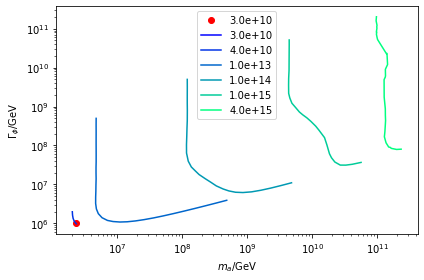

In [49]:
cmap = plt.get_cmap("winter")
for x, f_a, (curve_m_a, curve_Gamma_phi) in zip(np.linspace(0, 1, len(f_a_list)), f_a_list, curves):
    if len(curve_m_a) == 1:
        plt.plot(curve_m_a, curve_Gamma_phi, "or", label=f"{f_a:.1e}")
    plt.plot(curve_m_a, curve_Gamma_phi, color=cmap(x), label=f"{f_a:.1e}")
plt.xscale("log"); plt.yscale("log")
plt.xlabel(r"$m_a / \mathrm{GeV}$")
plt.ylabel(r"$\Gamma_\phi / \mathrm{GeV}$")
#scalar_map = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(f_a_list), vmax=max(f_a_list)))
#cbar = plt.colorbar(scalar_map)
#cbar.set_label(r"$f_a / \mathrm{GeV}$") # TODO: the colorbar is not correct!!!!
plt.legend()
plt.tight_layout()
plt.savefig(util.make_plot_path("correct_eta_B_curves_temp_dep.pdf"))

In [55]:
print(f"minimum: m_a = {min(curves[1][0]):e}, Gamma_phi = {min(curves[1][1]):e}")

minimum: m_a = 2.034354e+06, Gamma_phi = 9.667406e+05


## Find the minimal $m_a$ and $\Gamma_\varphi$

In [29]:
minimal_m_a, minimal_Gamma_phi = analysis.find_minimal_m_a_and_Gamma_phi(start_f_a=4e10, f_a_step_factor=2)
print(f"minimal: m_a = {minimal_m_a:e}; Gamma_phi = {minimal_Gamma_phi:e}")

step: 1


/home/jana/Documents/master-project/axion_spg/model.py:268: RuntimeWarning: overflow encountered in exp
  #assert rho_R != 0.0,  f"t = {t}, rho_a = {rho_a}"
/home/jana/Documents/master-project/axion_spg/model.py:272: RuntimeWarning: invalid value encountered in double_scalars
  return d_log_rho_R_d_log_t, d_log_rho_a_d_log_t, d_log_R_d_log_t
/home/jana/Documents/master-project/axion_spg/model.py:268: RuntimeWarning: overflow encountered in exp
  #assert rho_R != 0.0,  f"t = {t}, rho_a = {rho_a}"
/home/jana/Documents/master-project/axion_spg/model.py:272: RuntimeWarning: invalid value encountered in double_scalars
  return d_log_rho_R_d_log_t, d_log_rho_a_d_log_t, d_log_R_d_log_t


delta: inf
step: 2


AssertionError: f_a = 20000000000.0